# Data Pre-Analysis: FFT

In [1]:
import datetime

import gsod
import numpy as np
from numpy.fft import rfft
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

# SVG Graphing
set_matplotlib_formats("svg")

Load all data from station 583620

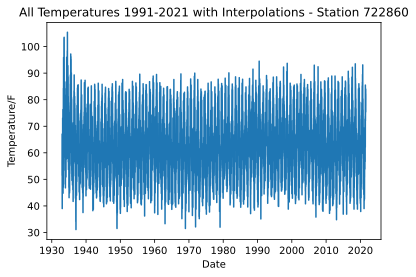

In [2]:
STATION = "722860"
ds = gsod.GsodDataset("/tmp/GSOD")
interpolated = ds.read_continuous(stn=STATION, year="????", interpolate=True)["TEMP"]
indices = interpolated.index
d = np.asarray(interpolated)

plt.xlabel("Date")
plt.ylabel("Temperature/F")
plt.title(f"All Temperatures 1991-2021 with Interpolations - Station {STATION}")
plt.plot(indices, d)

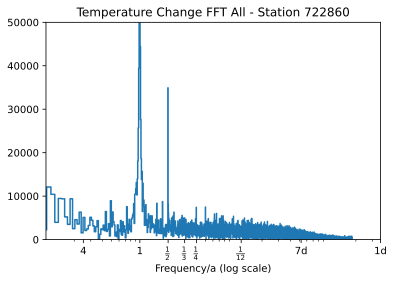

In [3]:
fft = rfft(d)
f_per_dataset = np.arange(len(fft))
n_samples_d = len(d)
days_per_year = 365.2524
years_per_dataset = n_samples_d/days_per_year
f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale("log")
plt.ylim(0, 50000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks(
    [1/4, 1, 2, 3, 4, 12, days_per_year/7, days_per_year],
    labels=["4", "1", "$\\frac{1}{2}$", "$\\frac{1}{3}$", "$\\frac{1}{4}$", "$\\frac{1}{12}$", "7d", "1d"]
)
plt.xlabel("Frequency/a (log scale)")
plt.title(f"Temperature Change FFT All - Station {STATION}")
plt.show()